# Calculating spontaneous and noise correlations

In [2]:
import pool
import flow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cascade as cas
from copy import deepcopy
import os
import pandas as pd

In [13]:
driven=True
drive_css=('0', '135', '270')
drive_threshold=15

In [ ]:
mice = ['OA27', 'OA26', 'OA67', 'VF226', 'CC175']
cses = ['plus', 'minus', 'neutral', '0', '135', '270']
tags = None

for m in mice:
    days = flow.DateSorter.frommeta(mice=[m], tags=tags)
    for d in days:
        for cs in cses:
            pool.calc.correlations.noise(d, cs, trange=(0, 3), cutoff_before_lick_ms=50)
            pool.calc.correlations.noise(d, cs, trange=(0, 3))


In [62]:
np.shape(test[d1_ids_bool][:, d1_ids_bool])

(217, 217)

<Figure size 432x288 with 0 Axes>

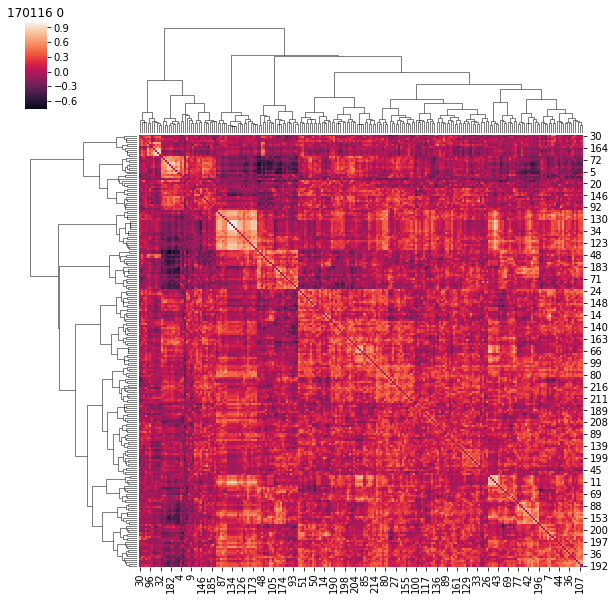

<Figure size 432x288 with 0 Axes>

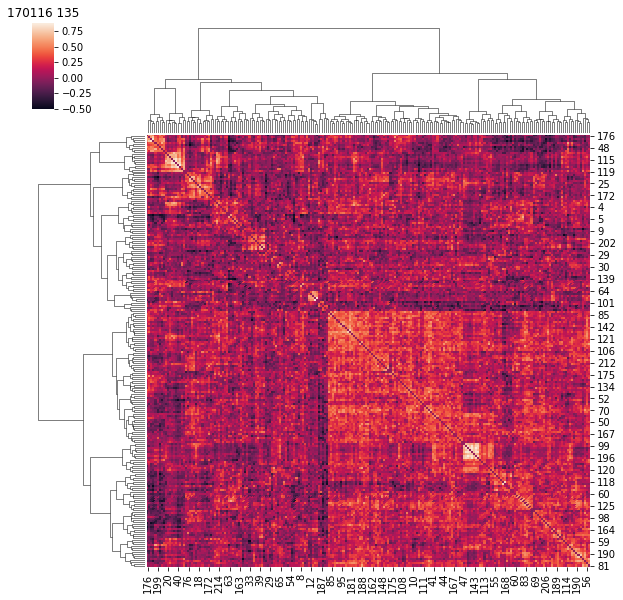

<Figure size 432x288 with 0 Axes>

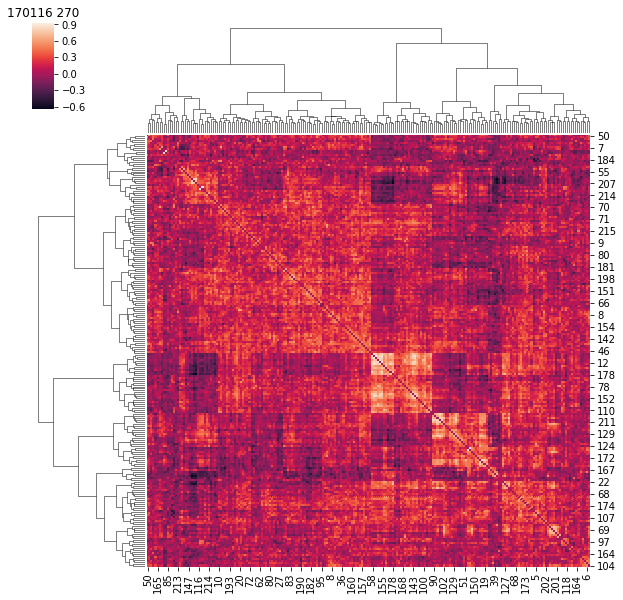

In [15]:
days = flow.DateSorter.frommeta(mice=['OA27'], tags=None)
for c, day1 in enumerate(days):
    
    # get cell_ids
    d1_ids = flow.xday._read_crossday_ids(day1.mouse, day1.date)
    d1_ids = np.array([int(s) for s in d1_ids])

    # filter cells based on visual/trial drive across all cs, prevent
    # breaking when only pavs are shown
    if driven:
        good_ids = cas.tca._group_drive_ids(days, drive_css, drive_threshold)
        d1_ids_bool = np.isin(d1_ids, good_ids)
        d1_sorter = np.argsort(d1_ids[d1_ids_bool])
    else:
        d1_ids_bool = np.ones(np.shape(d1_ids)) > 0
        d1_sorter = np.argsort(d1_ids[d1_ids_bool])
    ids = d1_ids[d1_ids_bool][d1_sorter]
    
    for cs in ['0', '135', '270']:
        test = pool.calc.correlations.noise(day1, cs)
        if np.sum(np.isnan(test.flatten())) > 0:
            continue
        plt.figure()
        sns.clustermap(test[d1_ids_bool][:, d1_ids_bool], method='ward')
        plt.title(str(days[c].date) + ' ' + cs)
    break

In [ ]:
np.shape(test)
plt.figure()
sns.clustermap(test)

In [28]:
# singleday_factors_annotated(
mouse='OA27'
trace_type='zscore_day'
method='ncp_bcd'
cs=''
warp=False
word='convinced'
extra_col=4
alpha=0.6
plot_running=True
filetype='pdf'
scale_y=False
verbose=False

pars = {'trace_type': trace_type, 'cs': cs, 'warp': warp}

days = flow.DateSorter.frommeta(mice=[mouse], tags=None)

cell_sz = np.shape(cas.df.get_xdaymap(mouse))

cell_map = np.zeros(cell_sz)
cell_map[:] = np.nan
cell_map_w = deepcopy(cell_map)
nz_daily = []
clus_daily = []
acorr_daily = []
acorr_daily_sort = []
# aclus_daily = []
aclus_daily_sort = []
for d, day1 in enumerate(days):
    
#     # all cells
#     d1_ids = flow.xday._read_crossday_ids(day1.mouse, day1.date)
    
#     # all runs
#     d1_runs = day1.runs()
    
#     # get all trace2p
#     for run in d1_runs:
#         t2p = run.trace2p()
        
    # load dir
    load_dir = cas.paths.tca_path(mouse, 'single',
                              pars=pars, word=word)
    tensor_path = os.path.join(load_dir, str(day1.mouse)
                               + '_' + str(day1.date)
                               + '_single_decomp_'
                               + str(trace_type) + '.npy')
    input_tensor_path = os.path.join(load_dir, str(day1.mouse)
                                     + '_' + str(day1.date)
                                     + '_single_tensor_'
                                     + str(trace_type) + '.npy')
    input_ids_path = os.path.join(load_dir, str(day1.mouse)
                                  + '_' + str(day1.date)
                                  + '_single_ids_'
                                  + str(trace_type) + '.npy')
    meta_path = os.path.join(load_dir, str(day1.mouse)
                             + '_' + str(day1.date)
                             + '_df_single_meta.pkl')

    # load your data
    ensemble = np.load(tensor_path)
    ensemble = ensemble.item()
    ids = np.load(input_ids_path)
    intensor = np.load(input_tensor_path)
    
    # for plus only
    meta = pd.read_pickle(meta_path)
    orientation = meta['orientation']
    bool270 = np.isin(orientation, 270)
    
    
#     intensor = intensor[:,:,bool270]
    
#     print(np.shape(intensor))
#     intensor_mean = np.mean(intensor, axis=2)
#     mean_sub_intensor = np.zeros(np.shape(intensor))
#     test = np.zeros((np.shape(intensor)[0], np.shape(intensor)[2]))
#     tri_list = []
#     tri_list2 = []
#     for tri in range(np.shape(intensor)[2]):
# #         mean_sub_intensor[:,:,tri] = intensor[:,:,tri] - intensor_mean
#         tri_list.append(intensor[:,:,tri] - intensor_mean)
#         tri_list2.extend(np.mean(intensor[:,16:(16*3),tri], axis=1) - np.mean(intensor_mean[:,16:(16*3)], axis=1))
#         test[:,tri] = np.mean(intensor[:,16:(16*3),tri], axis=1) - np.mean(intensor_mean[:,16:(16*3)], axis=1)
# #     print(np.shape(test))
#     long_way = np.concatenate(tri_list, axis=1)
# #     plt.figure()
# #     plt.imshow(np.corrcoef(long_way), aspect='auto')
# #     plt.colorbar()
# #     plt.figure()
# #     plt.imshow(np.corrcoef(test), aspect='auto')
# #     plt.colorbar()
#     test_mcorr = np.corrcoef(test)
#     test_lcorr =np.corrcoef(np.corrcoef(long_way))

    # all ids for the day
    d1_ids = flow.xday._read_crossday_ids(day1.mouse, day1.date)
    d1_ids = np.array([int(s) for s in d1_ids])
    
    # sort neuron factors by component they belong to most
    sort_ensemble, my_sorts = cas.tca._sortfactors(ensemble[method])
    
    # remaking same randomization as arthurs calc
    randomizations=500
    trange=(-1, 6)
    cscorr = {}
    sscorr = {}
    cs_clusters = {}
    drive_thresh = 0
    for cs in ['0', '135', '270']:
#         trs = pool.stimulus.trials(day1, cs, start_s=trange[0], end_s=trange[1], trace_type='dff',
#                               cutoff_before_lick_ms=-1, error_trials=-1)
        
        csbool = np.isin(orientation, int(cs))
        trs = np.nanmean(intensor[:,16:48,csbool], axis=1)
        ncells = np.shape(trs)[0]
        corrs = np.zeros((ncells, ncells))
        corrs[:, :] = np.nan
        
        drive = pool.calc.driven.visually(day1, cs)
        drive_bool = drive[np.isin(d1_ids, ids)] > drive_thresh
        
        # get clusters
        cell_clusters = {}
        for k in sort_ensemble.results.keys():
            # factors are already sorted, so these will define
            # clusters, no need to sort again
            factors = sort_ensemble.results[k][0].factors[0]
            max_fac = np.argmax(factors, axis=1)
            cell_clusters[k] = max_fac[drive_bool]
        cs_clusters[cs] = cell_clusters

        # Catch cases when there aren't enough trials
        if np.shape(trs)[1] < 10:
            continue

        stimorder = np.arange(np.shape(trs)[1])
        if np.sum(np.invert(np.isfinite(trs))) == 0:
            corrs = np.corrcoef(trs)

            for i in range(randomizations):
                for c in range(ncells):
                    np.random.shuffle(stimorder)
                    trs[c, :] = trs[c, stimorder]

                corrs -= np.corrcoef(trs)/float(randomizations)
        sscorr[cs] = corrs[:, my_sorts[9]][my_sorts[9],:][drive_bool, :][:, drive_bool]  
        cscorr[cs] = corrs[drive_bool, :][:, drive_bool]    
    acorr_daily.append(cscorr)
    acorr_daily_sort.append(sscorr)
    aclus_daily_sort.append(cs_clusters)


    # get all noise correlations
#     nz = {}
#     for cs in ['0', '135', '270']:
#         nz_corr = pool.calc.correlations.noise(day1, cs, trange=(0, 3), cutoff_before_lick_ms=50)
#         nz_bool = np.isin(d1_ids, ids)
#         nz_corr_sub = nz_corr[nz_bool, :][:, nz_bool]
#         nz[cs] = nz_corr_sub

#     cell_ids = {}  # keys are rank
#     cell_clusters = {}
#     nz_corr_rank = {}
#     itr_num = 0  # use only best iteration of TCA, index 0
#     for k in sort_ensemble.results.keys():
#         # factors are already sorted, so these will define
#         # clusters, no need to sort again
#         factors = sort_ensemble.results[k][itr_num].factors[0]
#         max_fac = np.argmax(factors, axis=1)
#         cell_clusters[k] = max_fac
#         if k == 10:
#             clus_daily.append(cell_clusters[k])
#         cell_ids[k] = ids[my_sorts[k-1]]
# #         if k == 10:
# #             print(cell_ids[k])
#         new_nz = deepcopy(nz)
#         for cs in ['0', '135', '270']:
#             new_nz[cs] = new_nz[cs][my_sorts[k-1], :][:, my_sorts[k-1]]
# #             if (k == 10) & (cs == '270'):
# #                 plt.figure()
# #                 sns.heatmap(nz[cs])
# #                 plt.title(str(cs))
# #                 plt.figure()
# #                 sns.heatmap(new_nz[cs])
# #                 plt.title(str(cs + ' sorted'))
#         nz_corr_rank[k] = new_nz
#     nz_daily.append(nz_corr_rank)


#     cell_weights = {}
#     for k in sort_ensemble.results.keys():
#         factors = sort_ensemble.results[k][itr_num].factors[0]
#         best_fac = np.zeros(np.shape(factors[:,0]))
#         for c in range(np.shape(factors)[1]):
#             fac_vec = deepcopy(factors[:, c])
#             fac_vec[cell_clusters[k] != c] = 0
#             best_fac += fac_vec
#         cell_weights[k] = best_fac
    
#     match_rank = 10
#     for cell in range(len(cell_clusters[match_rank])): # cell ids are 1 indexed
#         if cell_weights[match_rank][cell] < 0.3:
#             continue
#         cell_idx = cell_ids[match_rank][cell]
#         cell_map[cell_idx, d] = cell_clusters[match_rank][cell]
#         cell_map_w[cell_idx, d] = cell_weights[match_rank][cell]
    

In [ ]:
aclus_daily_sort[c][cs][r]

/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyError: '0'

<Figure size 432x288 with 0 Axes>

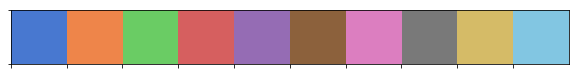

<Figure size 432x288 with 0 Axes>

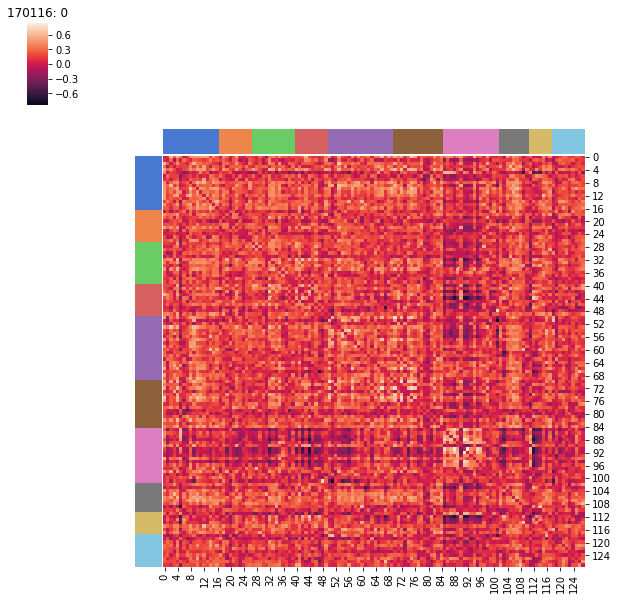

<Figure size 432x288 with 0 Axes>

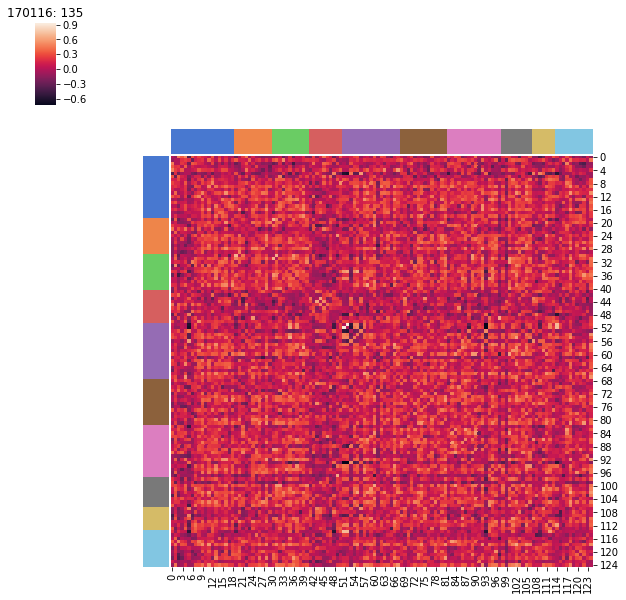

<Figure size 432x288 with 0 Axes>

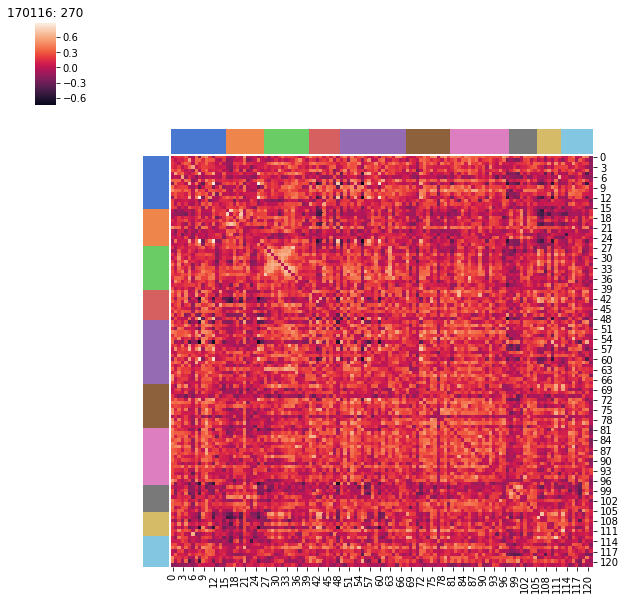

<Figure size 432x288 with 0 Axes>

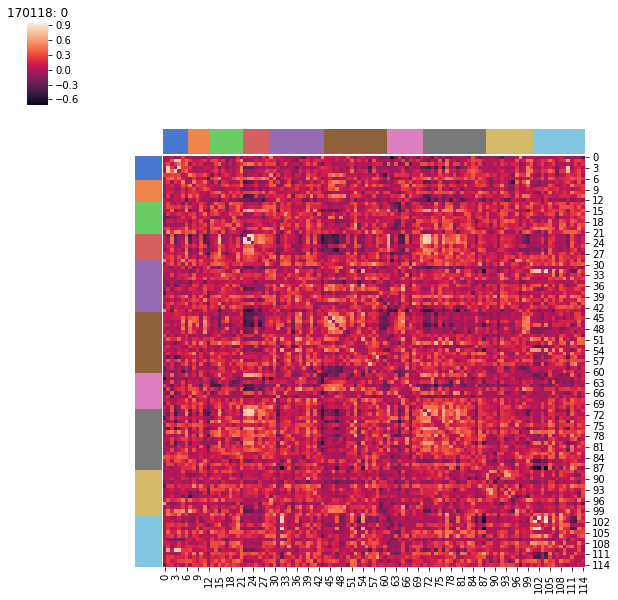

<Figure size 432x288 with 0 Axes>

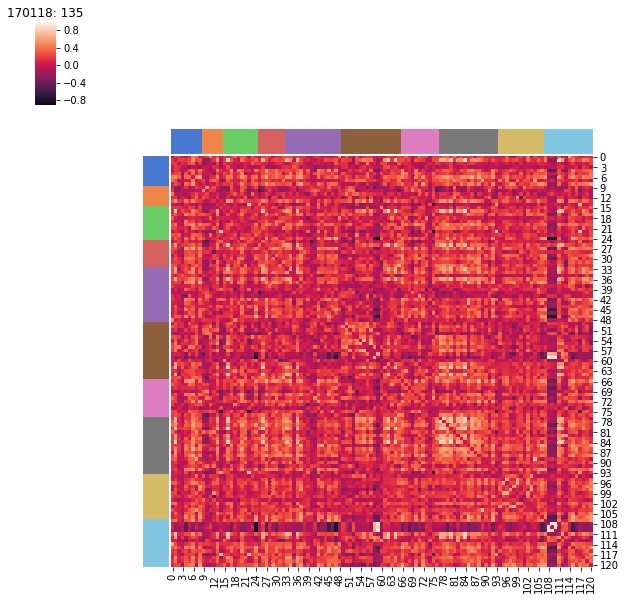

<Figure size 432x288 with 0 Axes>

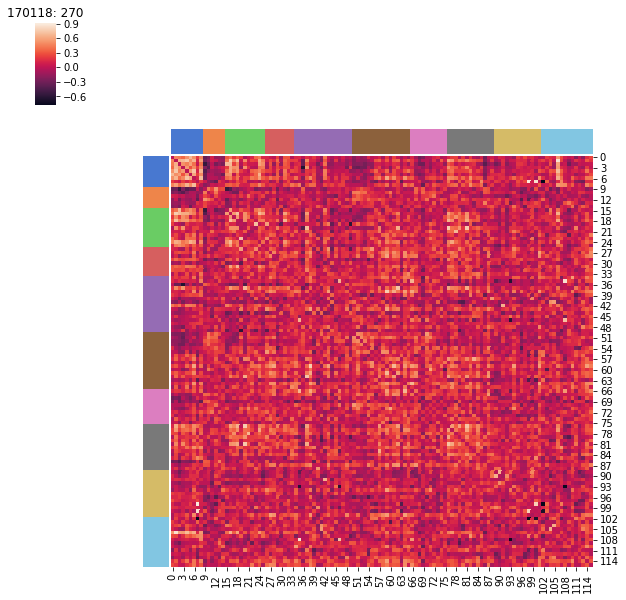

<Figure size 432x288 with 0 Axes>

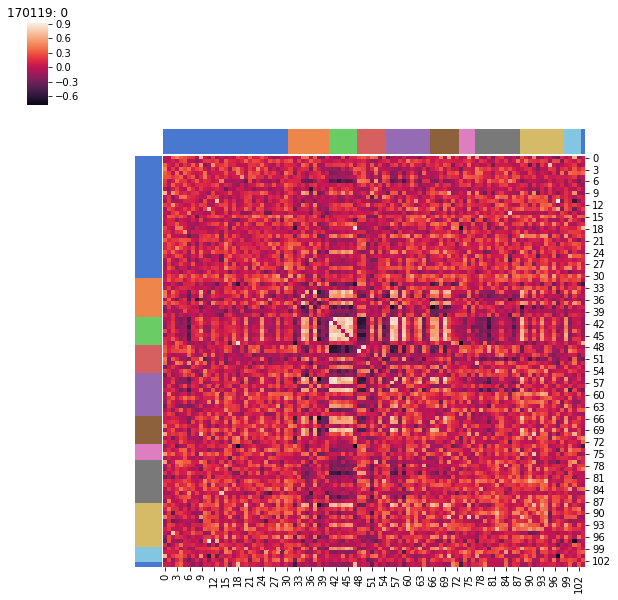

<Figure size 432x288 with 0 Axes>

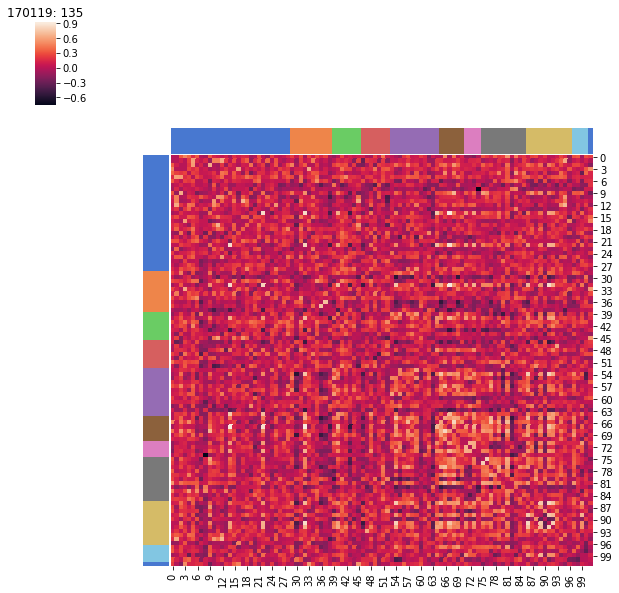

<Figure size 432x288 with 0 Axes>

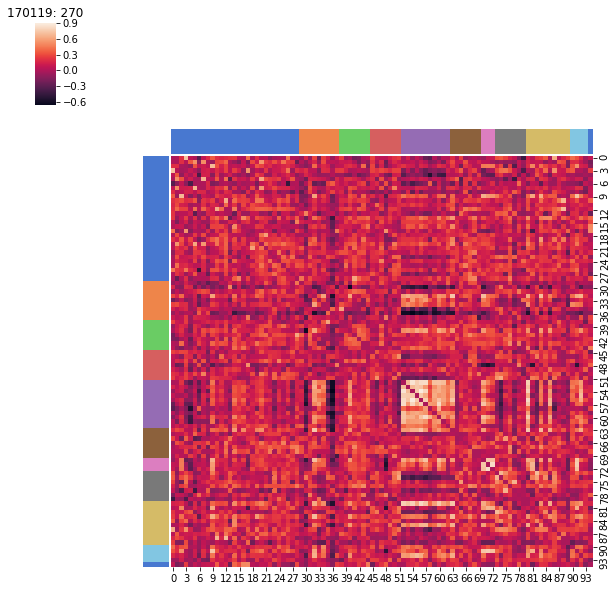

<Figure size 432x288 with 0 Axes>

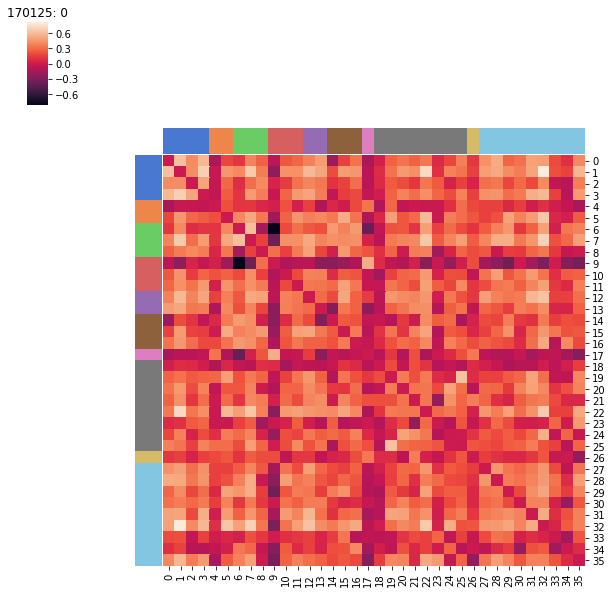

<Figure size 432x288 with 0 Axes>

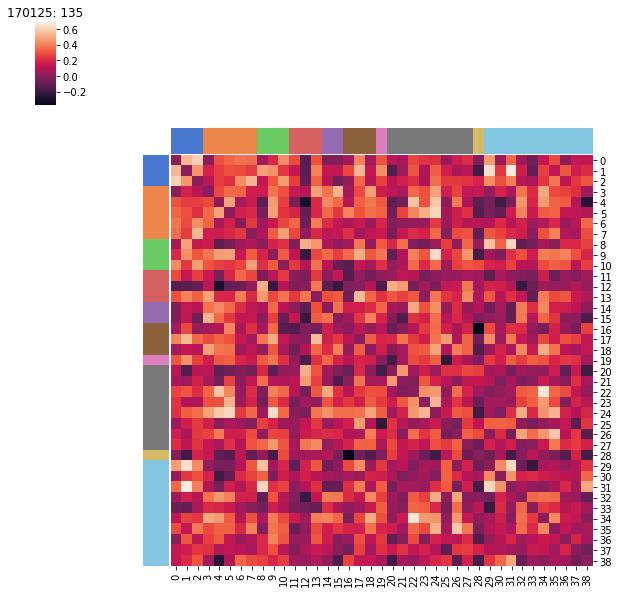

<Figure size 432x288 with 0 Axes>

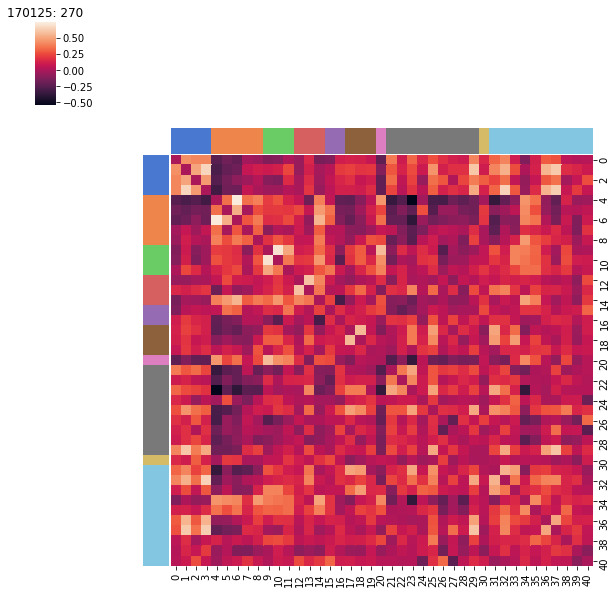

<Figure size 432x288 with 0 Axes>

In [29]:
# plt.figure()
# sns.heatmap(acorr_daily[0]['0'], square=True)
# plt.figure()
# sns.heatmap(acorr_daily[0]['135'], square=True)
# plt.figure()
# sns.heatmap(acorr_daily[0]['270'], square=True)

# plt.figure()
# sns.heatmap(acorr_daily_sort[0]['0'], square=True)
# plt.figure()
# sns.heatmap(acorr_daily_sort[0]['135'], square=True)
# plt.figure()
# sns.heatmap(acorr_daily_sort[0]['270'], square=True)

# looking at factors compared to all pairwise cells noise corrlations 
r = 10
cmap = sns.color_palette('muted', r)
plt.figure()
sns.palplot(cmap)
for c, corr in enumerate(acorr_daily_sort):
#     print(res[10])
    if np.sum(np.isnan(corr[cs]).flatten()) > 0:
        continue
    for cs in ['0', '135', '270']:
        color_vec = [cmap[int(k)] for k in aclus_daily_sort[c][cs][r]]
        plt.figure()
        sns.clustermap(corr[cs], row_colors=color_vec, col_colors=color_vec, row_cluster=False, col_cluster=False, method='ward')
        plt.title(str(days[c].date) + ': ' + cs)
    if c == 10:    
        break

In [ ]:
stimorder = np.arange(np.shape(trs)[1])
print(stimorder)
np.random.shuffle(stimorder)
print(stimorder)

<Figure size 432x288 with 0 Axes>

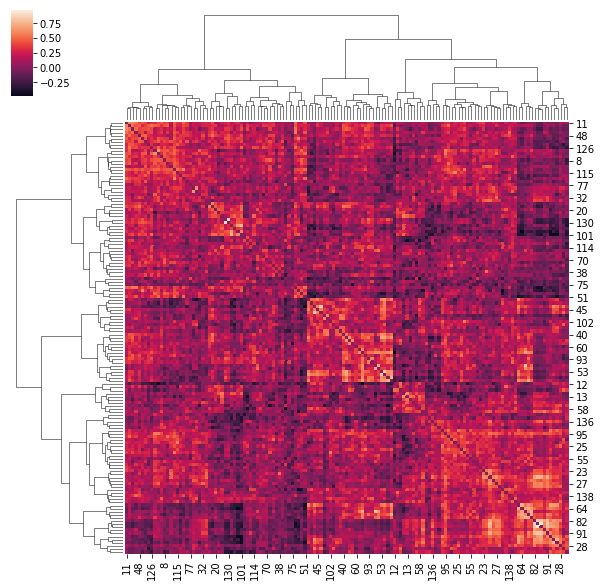

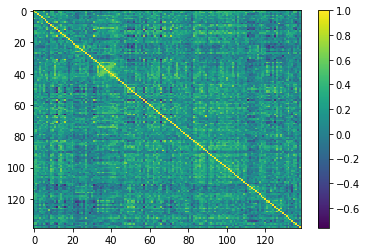

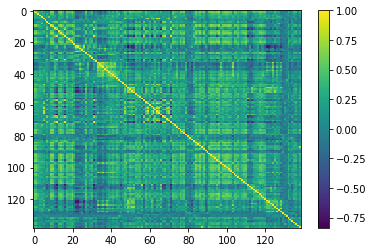

In [84]:
plt.figure()
from_calc = pool.calc.correlations.noise(day1, '270', 
                                         trange=(0, 2),
                                         cutoff_before_lick_ms=50,
                                         trace_type='dff')[np.isin(d1_ids, ids),:][:,np.isin(d1_ids, ids)]
# plt.imshow(from_calc[my_sorts[9],:][:,my_sorts[9]], aspect='auto')
sns.clustermap(from_calc[my_sorts[9],:][:,my_sorts[9]], method='ward')
# plt.colorbar()

plt.figure()
plt.imshow(test_mcorr[my_sorts[9],:][:,my_sorts[9]], aspect='auto')
plt.colorbar()

plt.figure()
plt.imshow(test_lcorr[my_sorts[9],:][:,my_sorts[9]], aspect='auto')
plt.colorbar()

In [ ]:
# looking at mean within vs across group corr by factor
cmap = sns.color_palette('muted', match_rank)
cs = '270'
r = 10
for c, res in enumerate(nz_daily):
#     print(res[10])
    if np.sum(np.isnan(res[r][cs]).flatten()) > 0:
        continue
    color_vec = [cmap[int(k)] for k in clus_daily[c]]
    
    ingroup = np.zeros(r)
    outgroup = np.zeros(r)
    allgroup = np.zeros((r,r))
    for r1 in np.unique(clus_daily[c]):
        for r2 in np.unique(clus_daily[c]):
            bool_fac1 = clus_daily[c] == r1
            bool_fac2 = clus_daily[c] == r2
            allgroup[r1, r2] = np.mean(res[r][cs][:, bool_fac1][bool_fac2, :])
        ingroup[r1] = np.mean(res[r][cs][:, bool_fac1][bool_fac1, :])
        outgroup[r1] = np.mean(res[r][cs][:, bool_fac1][~bool_fac1, :])
        
    plt.figure()
#     plt.imshow(allgroup)

    plt.plot(ingroup, label='in')
    plt.plot(outgroup, label = 'out')
    plt.legend()
#     plt.colorbar()
#     sns.clustermap(res[r][cs], row_cluster=True, col_cluster=True, method='ward', row_colors=color_vec, col_colors=color_vec)
    plt.title(str(days[c].date) + ' ' + cs)

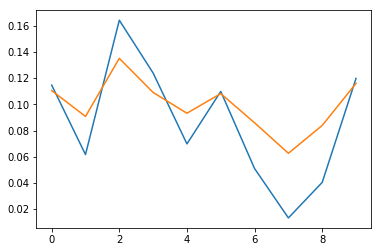

In [132]:
plt.figure()
plt.plot(ingroup)
plt.plot(outgroup)

In [127]:
bool_fac2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

<Figure size 432x288 with 0 Axes>

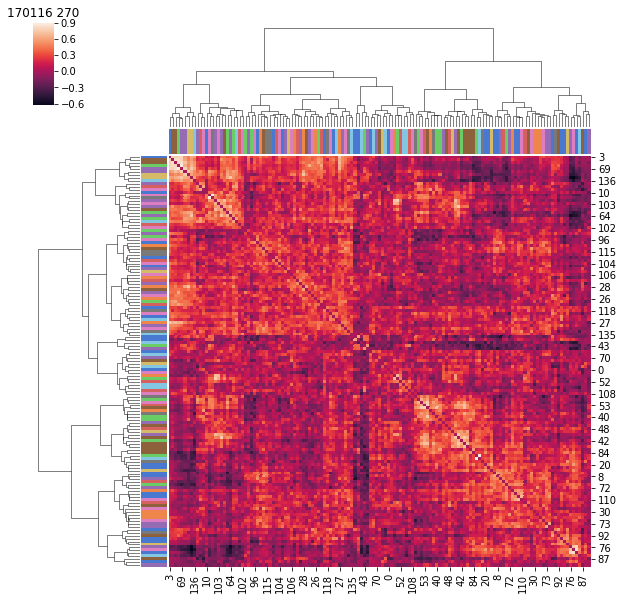

<Figure size 432x288 with 0 Axes>

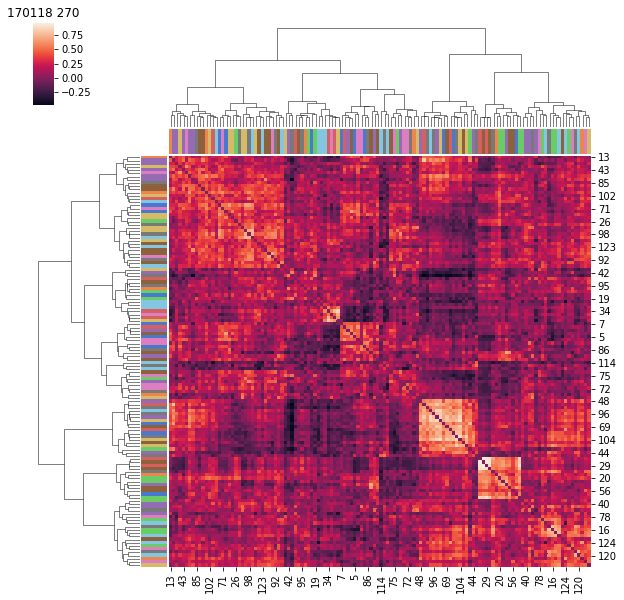

<Figure size 432x288 with 0 Axes>

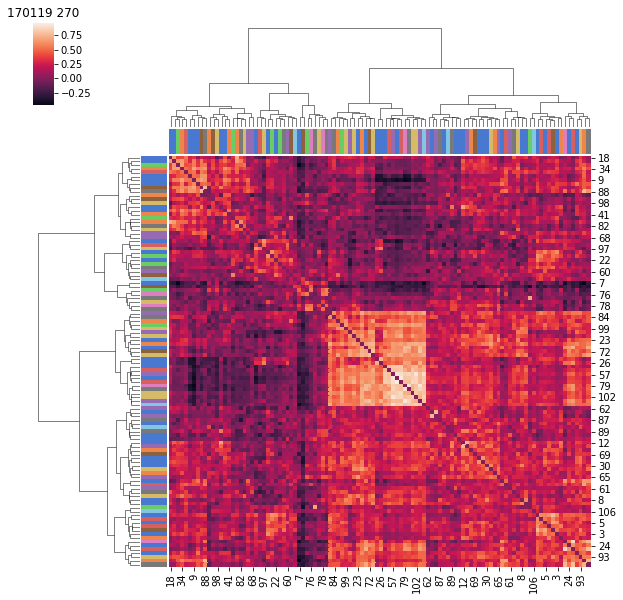

<Figure size 432x288 with 0 Axes>

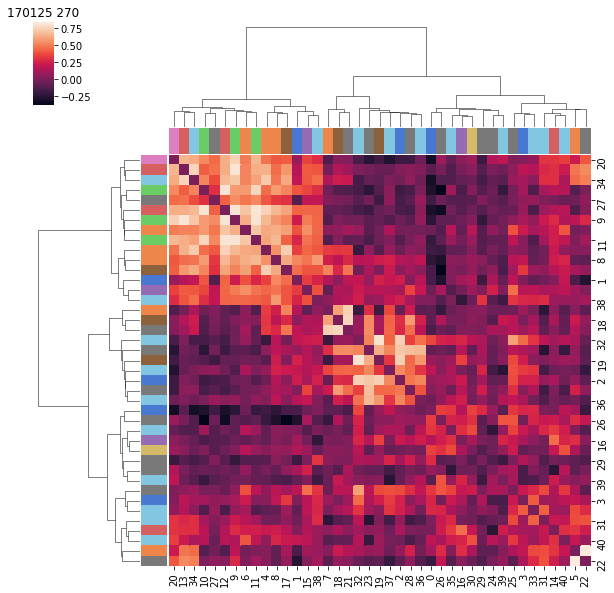

<Figure size 432x288 with 0 Axes>

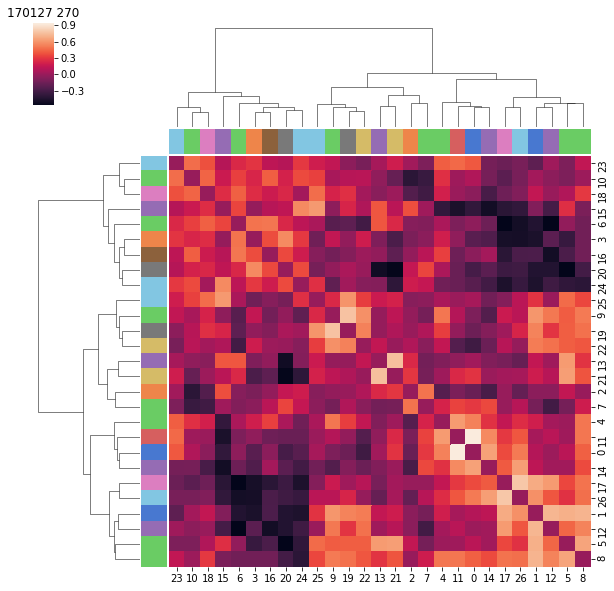

<Figure size 432x288 with 0 Axes>

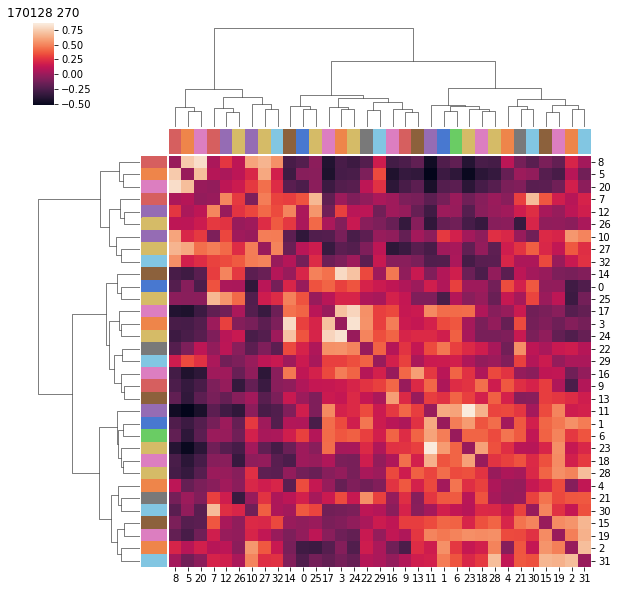

<Figure size 432x288 with 0 Axes>

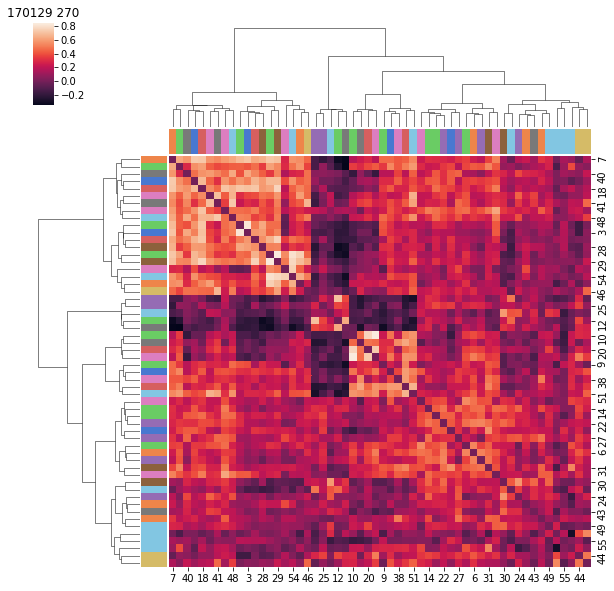

<Figure size 432x288 with 0 Axes>

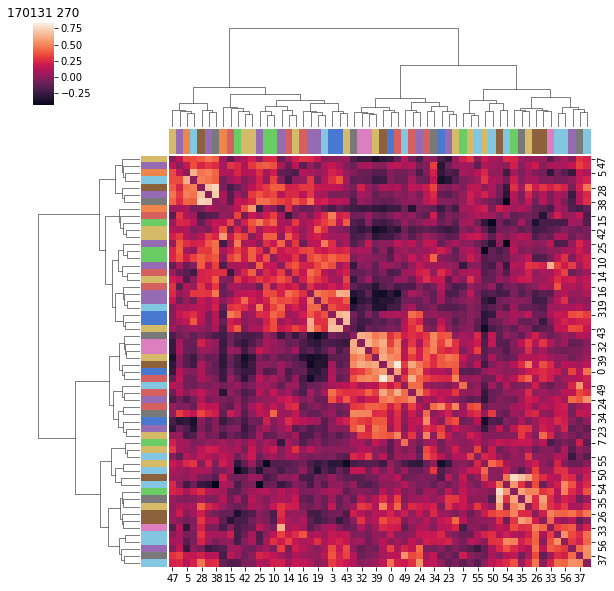

<Figure size 432x288 with 0 Axes>

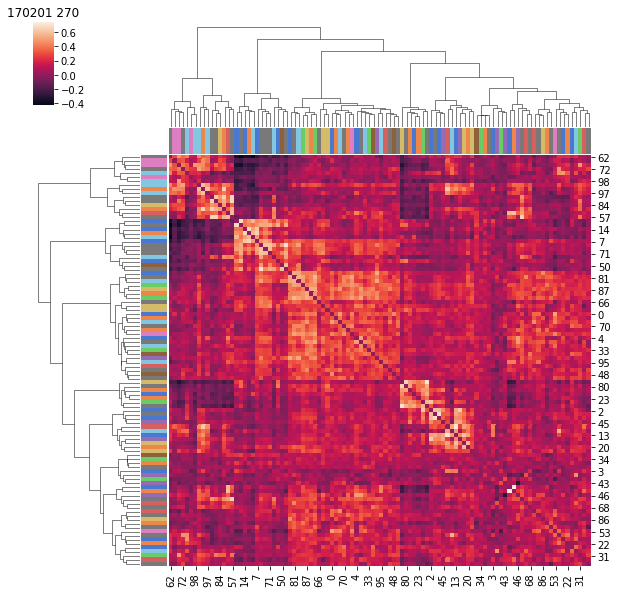

<Figure size 432x288 with 0 Axes>

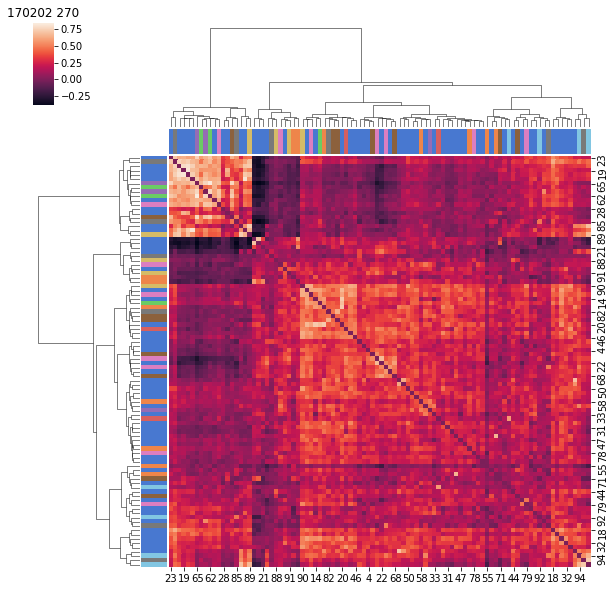

<Figure size 432x288 with 0 Axes>

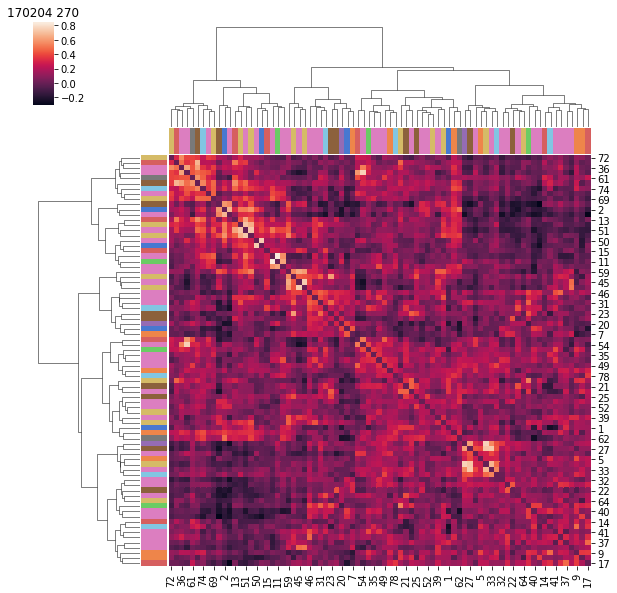

<Figure size 432x288 with 0 Axes>

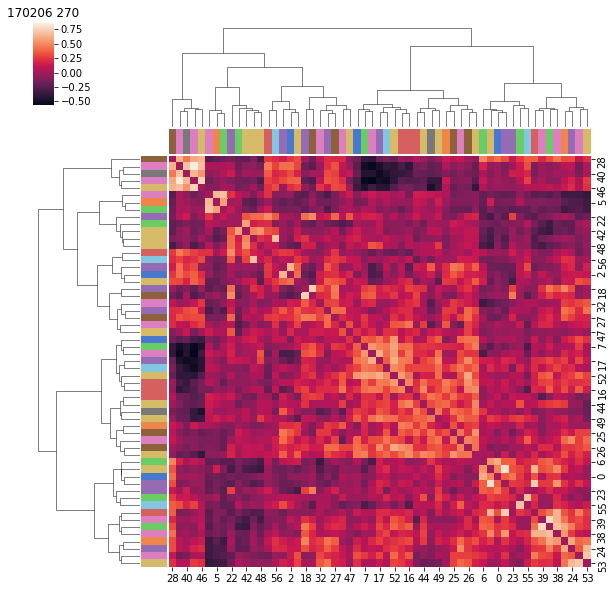

<Figure size 432x288 with 0 Axes>

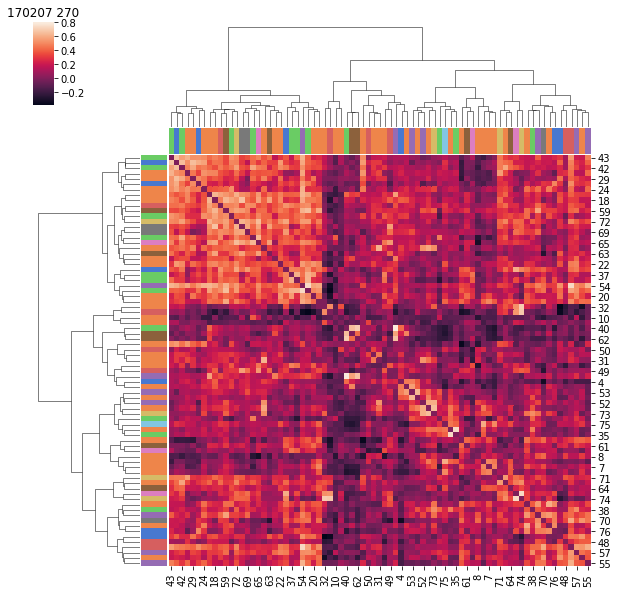

<Figure size 432x288 with 0 Axes>

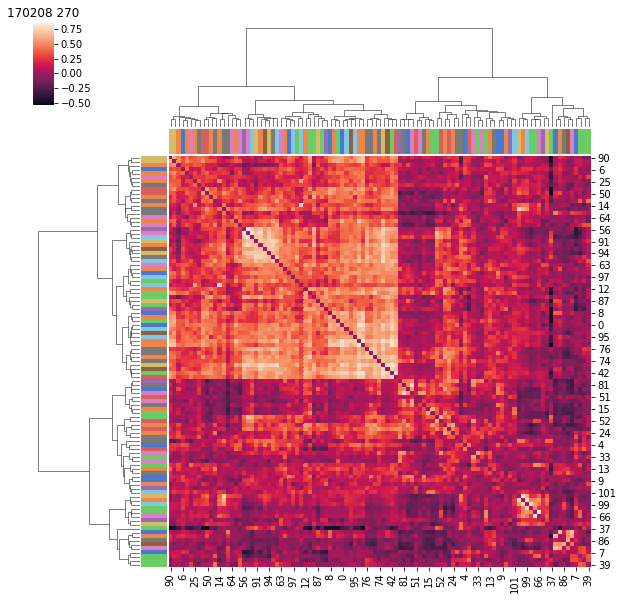

<Figure size 432x288 with 0 Axes>

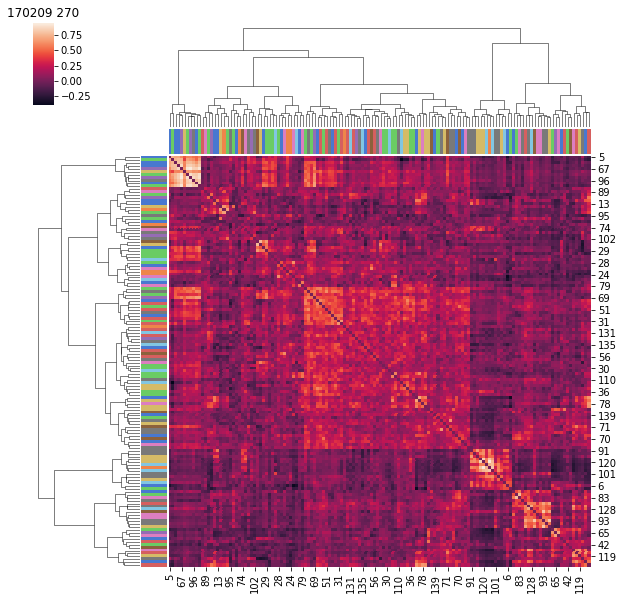

<Figure size 432x288 with 0 Axes>

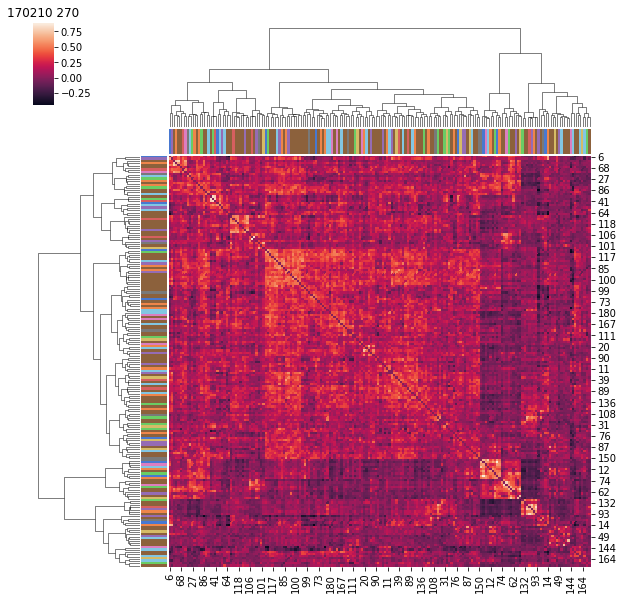

<Figure size 432x288 with 0 Axes>

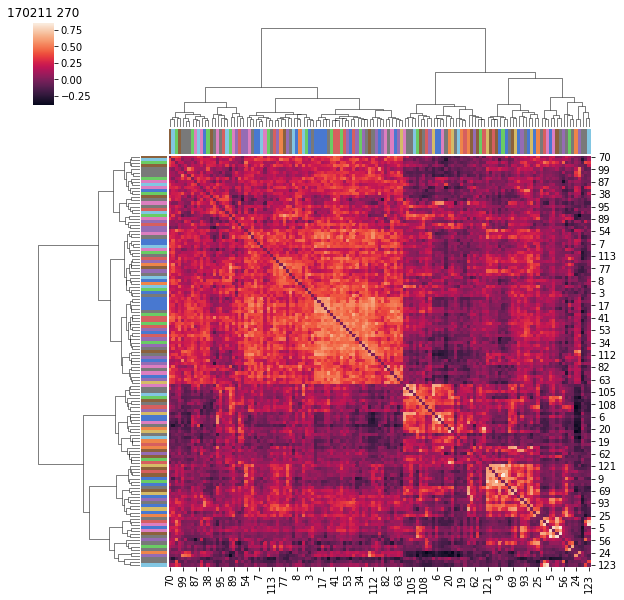

<Figure size 432x288 with 0 Axes>

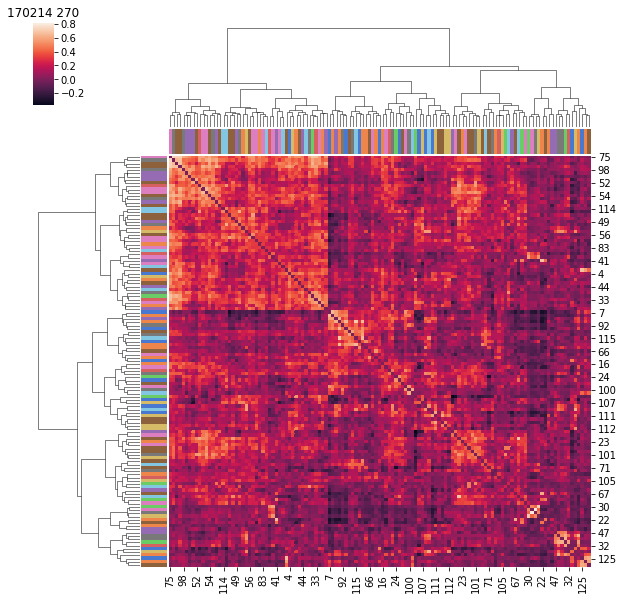

<Figure size 432x288 with 0 Axes>

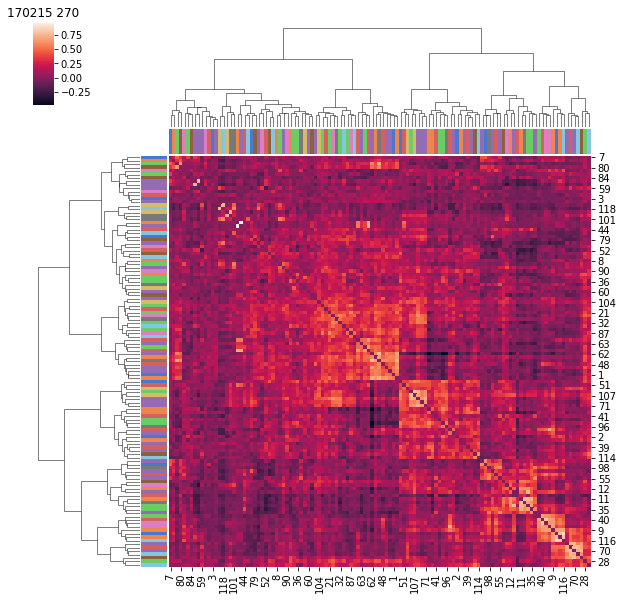

<Figure size 432x288 with 0 Axes>

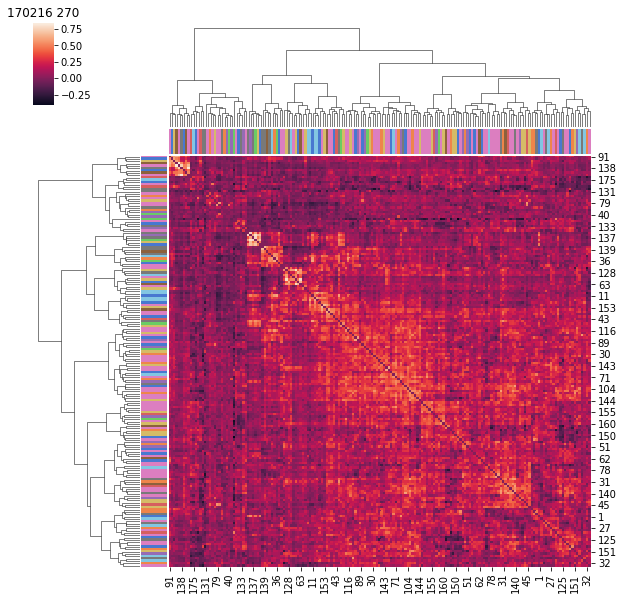

<Figure size 432x288 with 0 Axes>

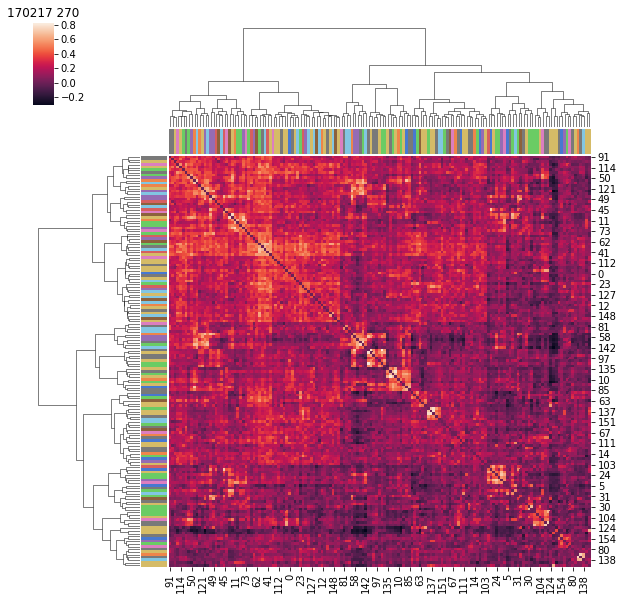

<Figure size 432x288 with 0 Axes>

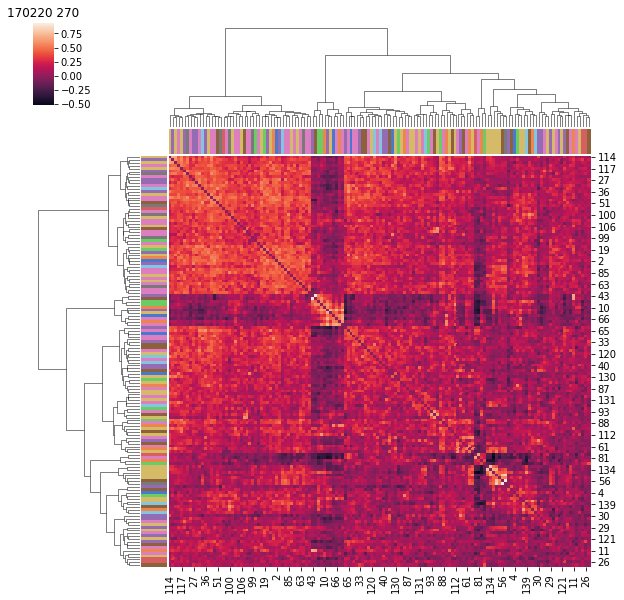

<Figure size 432x288 with 0 Axes>

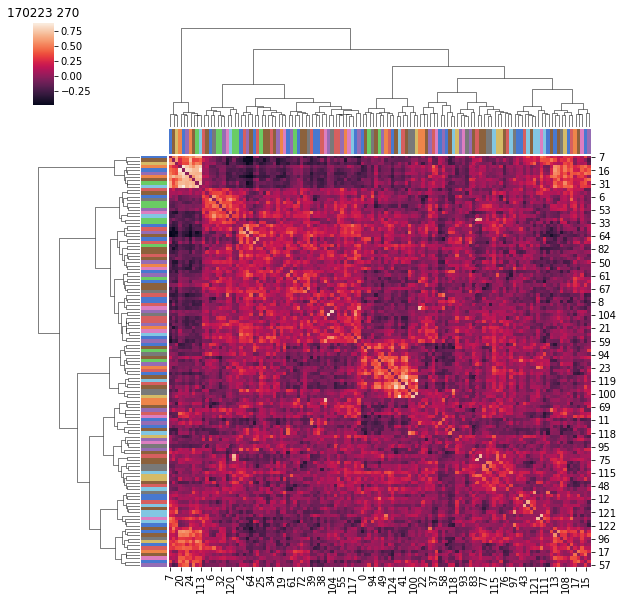

<Figure size 432x288 with 0 Axes>

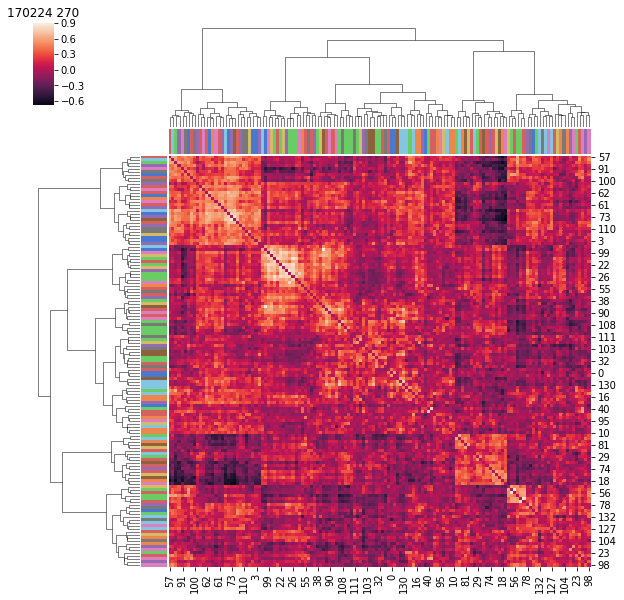

<Figure size 432x288 with 0 Axes>

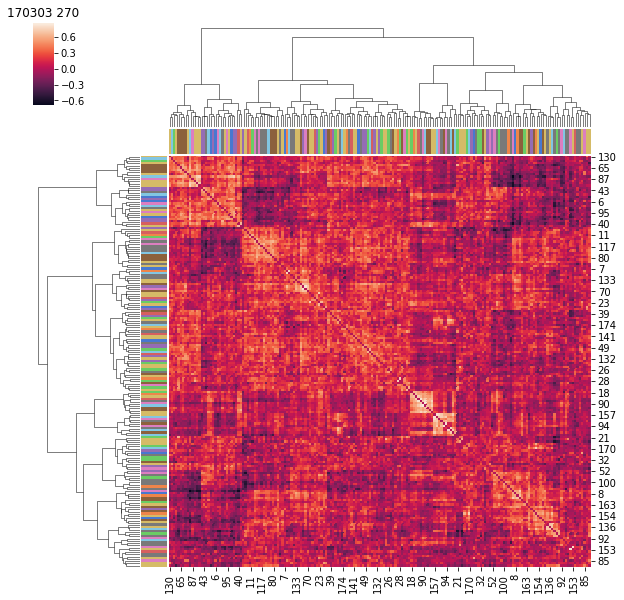

<Figure size 432x288 with 0 Axes>

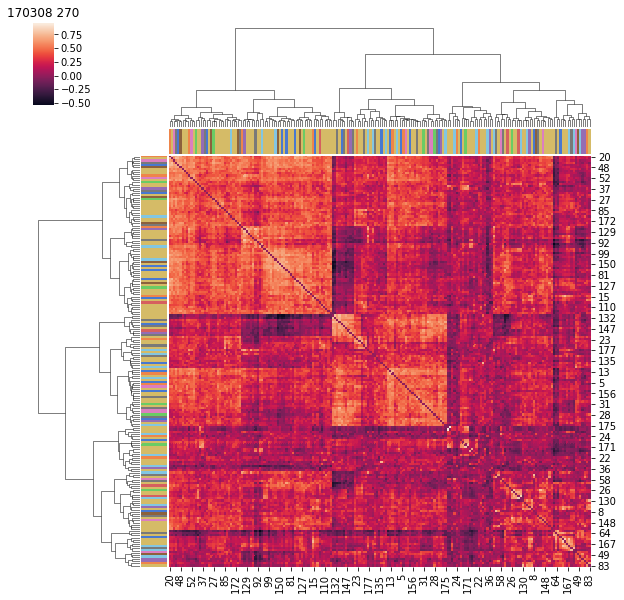

<Figure size 432x288 with 0 Axes>

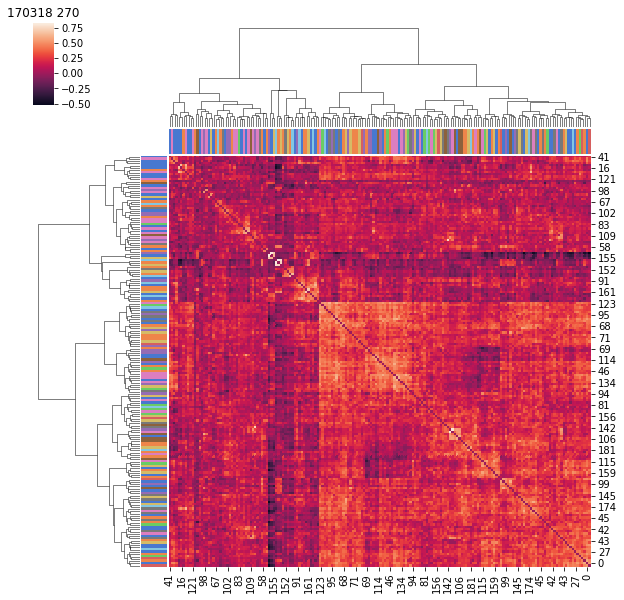

<Figure size 432x288 with 0 Axes>

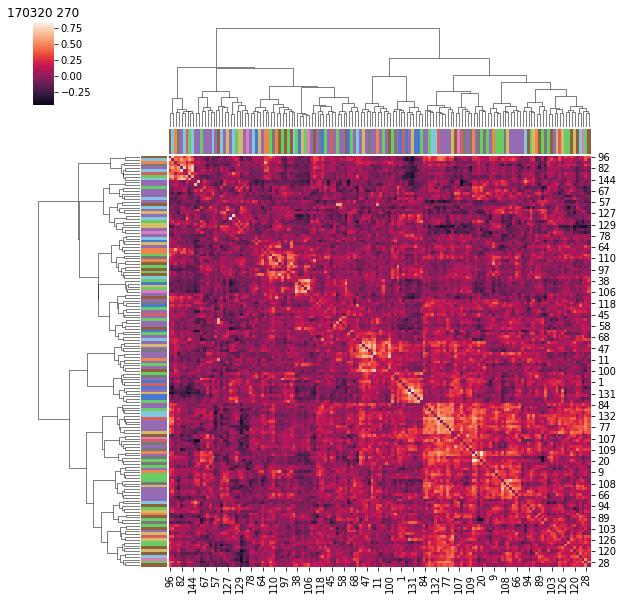

<Figure size 432x288 with 0 Axes>

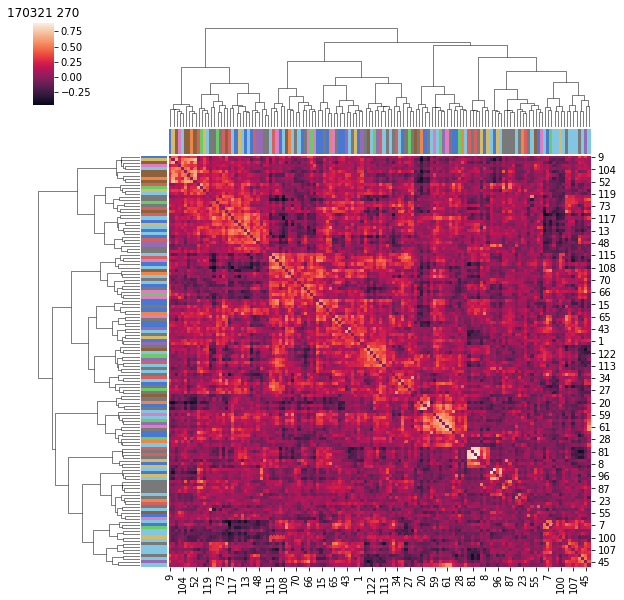

<Figure size 432x288 with 0 Axes>

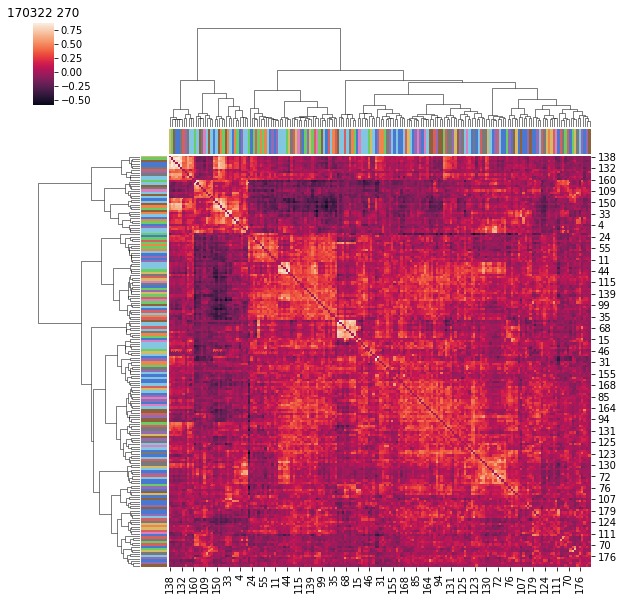

<Figure size 432x288 with 0 Axes>

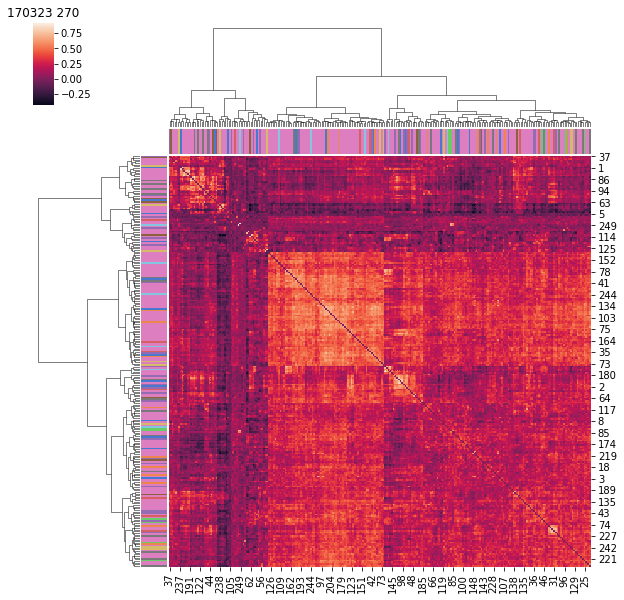

<Figure size 432x288 with 0 Axes>

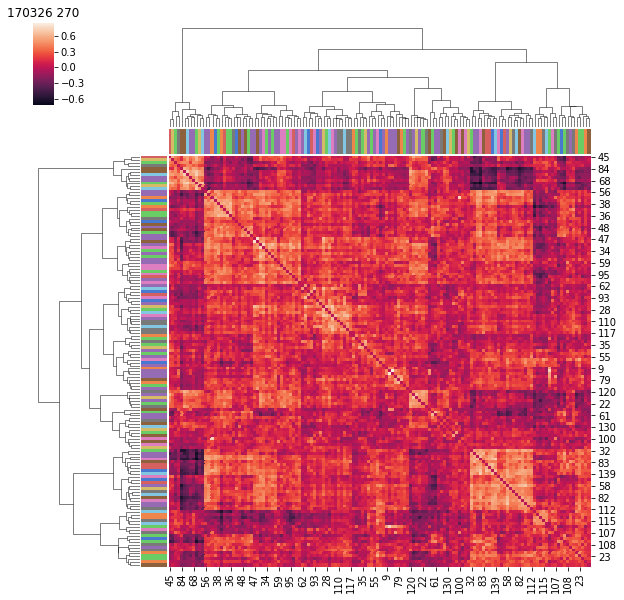

<Figure size 432x288 with 0 Axes>

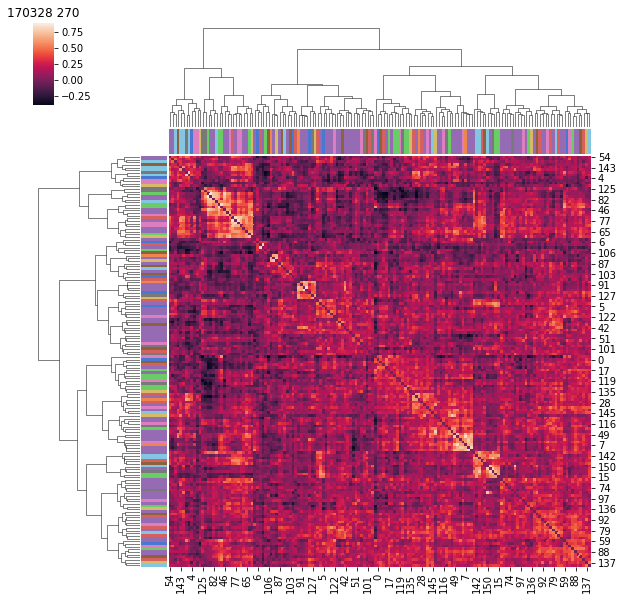

<Figure size 432x288 with 0 Axes>

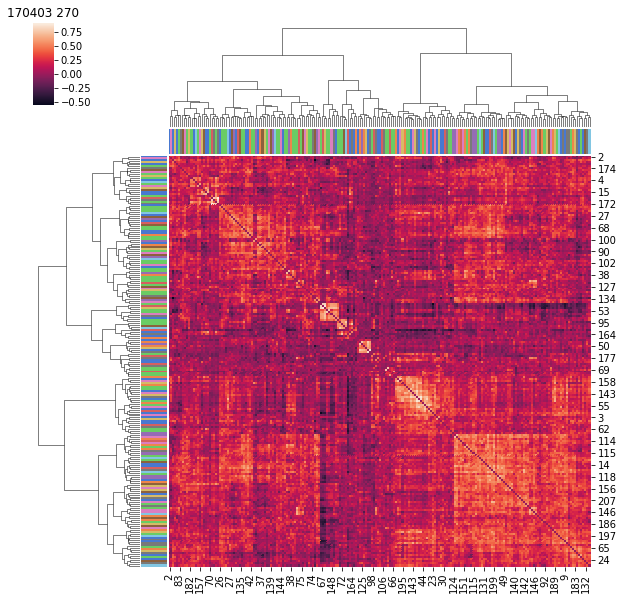

<Figure size 432x288 with 0 Axes>

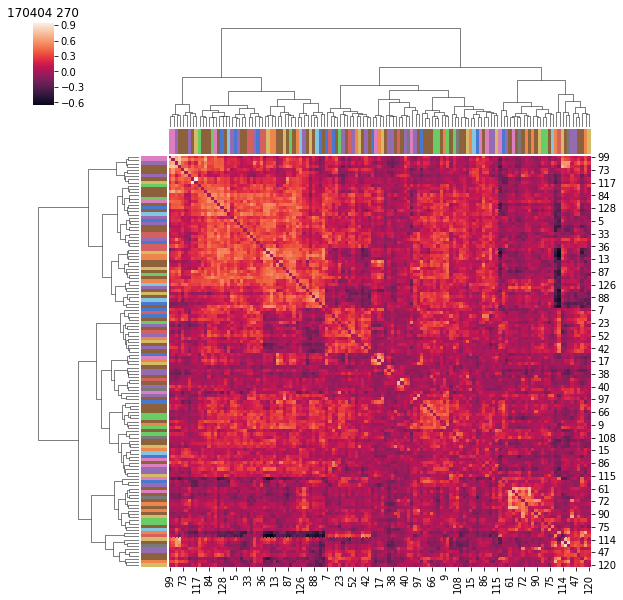

In [122]:
# looking at factors compared to all pairwise cells noise corrlations 
cmap = sns.color_palette('muted', match_rank)
cs = '270'
r = 10
for c, res in enumerate(nz_daily):
#     print(res[10])
    if np.sum(np.isnan(res[r][cs]).flatten()) > 0:
        continue
    color_vec = [cmap[int(k)] for k in clus_daily[c]]
    plt.figure()
    sns.clustermap(res[r][cs], row_cluster=True, col_cluster=True, method='ward', row_colors=color_vec, col_colors=color_vec)
    plt.title(str(days[c].date) + ' ' + cs)

In [ ]:
res[10]

print(k)

In [ ]:
days = flow.DateSorter.frommeta(mice=['OA27'], tags=tags)
for day1 in days:
    
    # get cell_ids
    d1_ids = flow.xday._read_crossday_ids(day1.mouse, day1.date)
    d1_ids = np.array([int(s) for s in d1_ids])

    # filter cells based on visual/trial drive across all cs, prevent
    # breaking when only pavs are shown
    if driven:
        good_ids = cas.tca._group_drive_ids(days, drive_css, drive_threshold)
        d1_ids_bool = np.isin(d1_ids, good_ids)
        d1_sorter = np.argsort(d1_ids[d1_ids_bool])
    else:
        d1_ids_bool = np.ones(np.shape(d1_ids)) > 0
        d1_sorter = np.argsort(d1_ids[d1_ids_bool])
    ids = d1_ids[d1_ids_bool][d1_sorter]
    
    for cs in ['0', '135', '270']:
        test = pool.calc.correlations.noise(day1, cs)
        if np.sum(np.isnan(test.flatten())) > 0:
            continue
        plt.figure()
        sns.clustermap(test[d1_ids_bool][:, d1_ids_bool], method='average')
        plt.title(str(days[0].date))
    break
